<a href="https://colab.research.google.com/github/AlexAlexeyuk/Hospital_epicrisis_data_analysis/blob/1%2F02%2F2021/20_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import os
import pandas as pd
import glob
import string
import nltk
import re
import numpy as np

In [97]:
class Utils():
    root_directory = os.chdir('/content/drive/MyDrive/parser')# input path
    list_of_files = glob.glob('**/*.txt', recursive=True)
    invalid_parsing = []
    trash = ['Волковыск-1.txt','Волковыск.txt','Вороново-1.txt',
         'Вороново.txt', 'Черновик-1.txt', 'Черновик.txt']
    for file in list_of_files:
        try:
             with open(file, encoding='utf-8') as f:
                    num = f.readline()
                    file_ = f.read()
                    if num and file_:
                        pass
        except:
            invalid_parsing.append(file)
    for i in invalid_parsing:
        list_of_files.remove(i)
    for i in trash: 
        list_of_files.remove(i)


list_of_files = Utils.list_of_files


In [98]:
plt_ = []
wbc_ = []
hgb_ = []
crea_ = []
ldh_ = []
sex_ = []
crp_ = []
tr = []
bir = []
ad = []
dis = []
ID_ = []
dgs_ = []
rf_ = []
alt_ = []
ast_ = []
pct_ = []
esr_ = []
fibrin_ = []

In [99]:
def esr(file_):
  file_ = ''.join(file_.split()).lower()
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  patt = re.compile(r'(?<=соэ)\d+')
  patt1 = patt.findall(file_)
  try:
    if patt1:
      return np.float_(patt1)
    else:
      return 'None'
  except:
    pass

def fibrn(file_):
  file_ = ''.join(file_.split()).lower()
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r',', '.', file_)
  patt = re.compile(r'(?:фибриноген|фибр\.|фибрин|ф)(\d+.\d+)')
  patt1 = patt.findall(file_)
  try:
    if patt1:
      return np.float_(patt1)
    else:
      return 'None'
  except:
    pass


def ID(num):
  """returns ID of the patient"""
  for i in num.split():
    for char in i.split():
        if char.isnumeric():
            try:
                return int(char)
            except:
                return 'None'
            
            
def treatment(file_):
  """ returns srting of remedies used for the patient """
  for line in file_.split('\n'):
    if re.search('Провед.нное.лечение', line):  
        return(line.replace('Проведенное лечение:', \
                            '').replace('ЛФК', '').replace('ФТЛ', ''))
    

def born_adm_disch(file_):
    """ finds all nessesary dates in the epicrisis"""
    pattern = re.compile("(\d{2}).(\d{2}).(\d{4})") # check all dates
    birthday, admission = pattern.findall(file_)[:2]
    discharging = pattern.findall(file_)[-1]
    try:
        return ':'.join(birthday), ':'.join(admission), ':'.join(discharging)
    except:
        return 'None'


pattern_diagnosis = ['Диагноз:','Диагноз клинический:','Диагноз', 'Д-з:',
                     "Диагноз заключительный:"]
def diagnosis_dirty(file_):
  int_ = 0
  for i in file_.split():
    int_ += 1
    if i in pattern_diagnosis:
      return file_.split()[int_+1:int_+40]    
  

def crp(file_):
  """returns all crp values"""
  file_= ''.join(file_.split())
  file_ = re.sub(r'[ЦСC]РБ|\w\D(реактив.|реакт.|реак.)белок', 'С-реактивныйбелок', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'(?<!С-реактивныйбелок)\d\d\.\d\d', '', file_)
  file_ = re.sub(r',', '.', file_)
  pattern_1 = re.compile(r'(?:\w\Dреактивныйбелок|\w\Dреактивныйбелокдо)(\d*\.\d+|\d+)')
  pattern_2 = pattern_1.findall(file_)
  try:
    if pattern_2:
      return np.float_(pattern_2)
    else:
      return 'None'
  except:
    pass


def gender(file_):
  file_ = file_.title()
  file_ = ''.join(file_.split())
  file_ = re.sub(r'Диагноз.*', '', file_)
  patt1 = re.compile(r'[А-Я](\w{,19}(\w|\ич))[А-Я]\w{,20}(вна)')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return 'female'
    else:
      return 'male'
  except:
    pass
  

def ldh(file_):
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'\wактатдегидрогеназ\w', 'лдг', file_)
  file_ = re.sub(r'(?<!лдг)\d\d\.\d\d', '', file_)
  patt1 = re.compile(r'(?<=лдг)\d{,4}')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass



def cre(file_):
  """Returns all creatinine values"""
  file_= ''.join(file_.split())  
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'(\wреатини\w|креатин|креат)(?![а-яА-Я,])', 'cre', file_)
  file_ = re.sub(r'(?<!cre)\d\d\.\d\d', '', file_)
  patt1 = re.compile(r'(?<=cre)\d{2,3}')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass


def hgb(file_):
  """returns list of str with level of hemoglobin"""
  file_= ''.join(file_.split())  
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  patt = re.compile(r'гемоглобин|гемогл|гб|гем')
  patt1 = re.sub(patt, r'hgb', file_)
  patt2 = re.compile(r'(?<=hgb)\d{2,3}')
  all_hgb = patt2.findall(patt1)
  try:
    if all_hgb:
      return np.float_(all_hgb)
    else:
      return 'None'
  except:
    pass


def wbc(file_):
  """returns list of str with level of wbc"""
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'10(\*|[еe])9', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'\Dбщийанализкрови', 'оак', file_)
  file_ = re.sub(r'(?<=оак)гб\d*,', '', file_)
  file_ = re.sub(r',', '.', file_)
  patt1 = re.compile(r'(?<=оак|wbc)(?:л|лейкоцит\w)(\d*\.\d+|\d+)')
  all_wbc = patt1.findall(file_)
  try:
    if all_wbc:
      return np.float_(all_wbc)
    else:
      return 'None'
  except:
    pass


def plt(file_):
  """returns list of str with level of plt"""
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'10(\*|[еe])9', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  patt1 = re.compile(r'\wромбоцит\w|(?<![а-яА-Я])тр(?![а-яА-Я])')
  file_ = re.sub(patt1, r'plt', file_)
  file_ = re.sub(r'(?<!plt)\d\d\.\d\d', '', file_)
  patt2 = re.compile(r'(?<=plt)\d{3}')
  all_plt = patt2.findall(file_)
  try:
    if all_plt:
      return np.float_(all_plt)
    else:
      return 'None'
  except:
    pass


def rf(file_):
  file_= ''.join(file_.split())  
  file_ = re.sub(r'[а-яА-ЯёЁ]ДН[^Шш0-9]', 'ДН'.lower(), file_)
  file_ = re.sub(r'(?<=ДН)[1iI]{3}|[Шш]', '3', file_)
  file_ = re.sub(r'(?<=ДН)[1iI]{2}|1-2', '2', file_)
  file_ = re.sub(r'(?<=ДН)[оoОO]', '0', file_)
  patt1 = re.compile(r'(?<=ДН)\d')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return patt2
    else:
      return 0
  except:
      return 0



def alt(file_):
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'\wланинаминотрансфераз\w|алат', 'алт', file_)
  file_ = re.sub(r'(?<!алт)\d\d\.\d\d', '', file_)
  file_ = re.sub(r',', '.', file_) 
  patt1 = re.compile(r'(?<=алт)(\d*\.\d+|\d+)')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass


def ast(file_):
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'\wспартатаминотрансфераз\w|асат', 'аст', file_)
  file_ = re.sub(r'(?<!аст)\d\d\.\d\d', '', file_)
  file_ = re.sub(r',', '.', file_)
  patt1 = re.compile(r'(?<=аст)(\d*\.\d+|\d+)')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass


def pct(file_):
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'(?<=\,\d)\,|\.\d{2}\.\d\d\.\d{2,4}.', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}(\.|)', '', file_)
  file_ = re.sub(r'[–-]|[():<>=]', '', file_)
  file_ = re.sub(r'менее', '', file_)
  file_ = re.sub(r'от', '', file_)
  file_ = re.sub(r'(\wрокальцитони\w|прокальцитон|прокальцит|прокальц|рст)(?![а-яА-Я,])', 'pct', file_)
  file_ = re.sub(r',', '.', file_)
  patt1 = re.compile(r'(?<=pct)(\d*\.\d+|\d+)')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass

In [100]:
for file in list_of_files:
    try:
         with open(file, encoding='utf-8') as f:
                num = f.readline()
                file_ = f.read()
                ID_.append(ID((num)))
                tr.append(treatment((file_)))
                bir.append(born_adm_disch(file_)[0])
                ad.append(born_adm_disch(file_)[1])
                dis.append(born_adm_disch(file_)[2])
                dgs_.append(diagnosis_dirty((file_)))
                crp_.append(crp(file_))
                sex_.append(gender(file_))
                ldh_.append(ldh(file_))
                crea_.append(cre(file_))
                hgb_.append(hgb(file_))
                wbc_.append(wbc(file_))
                plt_.append(plt(file_))
                rf_.append(rf(file_))
                alt_.append(alt(file_))
                ast_.append(ast(file_))
                pct_.append(pct(file_))
                esr_.append(esr(file_))
                fibrin_.append(fibrn(file_))
    except:
        print('stp')

In [101]:
diagnosis_cleaned =  []
for diagnos in dgs_:
    try:
        diagnosis_cleaned.append(' '.join(diagnos))
    except:
        diagnosis_cleaned.append('None')
        
        
        
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))





list_wo_punct = []
for sent in diagnosis_cleaned:
    try:
        sent = remove_punctuation(sent.lower())
        list_wo_punct.append(sent)
    except:
        pass
        


In [102]:
covid_list = []    
for sent in list_wo_punct:
    pattern = re.sub(r'covid19', 'covid', sent )
    pattern = re.sub(r'коронавирусная', 'covid', pattern)
    pattern = re.sub(r'короновирусная', 'covid', pattern)
    pattern = re.sub(r'b342', 'covid', pattern)
    pattern = re.sub(r'sarscov2', 'covid', pattern)
    pattern = re.sub(r'торсков2', 'covid', pattern)
    pattern_1 = re.compile(r'covid')
    patt_2 = re.search(pattern_1, pattern)
    try:
        covid_list.append(patt_2)
    except:
        pass
    
    
c =[]
#если есть коронавирусная инфекция - 1, иначе - 0
for i in covid_list:
    if not i:
        c.append(0)
    else:
        c.append(1) 

In [103]:
pn_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'пневмония', 'J18', sent )
    pattern = re.sub(r'пне...ния', 'J18', pattern)
    pattern = re.sub(r'внегоспитальная', 'J18', pattern)
    pattern = re.sub(r'внебольничная', 'J18', pattern)
    pattern_1 = re.compile(r'J18')
    patt_2 = re.search(pattern_1, pattern)
    try:
        pn_list.append(patt_2)
    except:
        pass  
    
    
p = []
# если есть пневмония - 1, иначе - 0
for i in pn_list:
    if not i:
        p.append(0)
    else:
        p.append(1)

In [104]:
ihd_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'ссн', 'ИБС', sent )
    pattern = re.sub(r'ибс', 'ИБС', pattern)
    pattern = re.sub(r'атеросклеротический', 'ИБС', pattern)
    pattern = re.sub(r'кардиосклероз', 'ИБС', pattern)
    pattern = re.sub(r'фп', 'ИБС', pattern)
    pattern = re.sub(r'фибрил....', 'ИБС', pattern)
    pattern_1 = re.compile(r'ИБС')
    patt_2 = re.search(pattern_1, pattern)
    try:
        ihd_list.append(patt_2)
    except:
        pass  
# итого, обработаны все возможные паттерны    
    
ihd = []

for i in ihd_list:
    if not i:
        ihd.append(0)
    else:
        ihd.append(1)

d = {}
for i in ihd:
    d[i]=d.get(i, 0)+1
d

{0: 1275, 1: 1008}

In [105]:
dm_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'сд', 'СД', sent )
    pattern = re.sub(r'сах.....', 'СД', pattern)
    pattern = re.sub(r'д.абет', 'СД', pattern)
    pattern_1 = re.compile(r'СД')
    patt_2 = re.search(pattern_1, pattern)
    try:
        dm_list.append(patt_2)
    except:
        pass  
    
dm_ = []

for i in dm_list:
    if not i:
        dm_.append(0)
    else:
        dm_.append(1)
        
d = {}
for i in dm_:
    d[i]=d.get(i, 0)+1
d

{0: 2151, 1: 132}

In [106]:
obes_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'ожир.н..', 'ОЖИРЕНИЕ', sent )
    pattern = re.sub(r'.нжо.', 'ОЖИРЕНИЕ', pattern)
    
    #pattern = re.sub(r'торсков2', 'covid', pattern)
    pattern_1 = re.compile(r'ОЖИРЕНИЕ')
    patt_2 = re.search(pattern_1, pattern)
    #patt_2 = pattern_1.findall(''.join(pattern.split()))
    try:
        obes_list.append(patt_2)
    except:
        pass  
    
ob_ = []

for i in obes_list:
    if not i:
        ob_.append(0)
    else:
        ob_.append(1)
    
d = {}
for i in ob_:
    d[i]=d.get(i, 0)+1
d

{0: 2169, 1: 114}

In [107]:
copd_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'хобл', 'ХОБЛ', sent )
    pattern = re.sub(r'другая обструктивная', 'ХОБЛ', pattern)
    pattern = re.sub(r'j44', 'ХОБЛ', pattern)
    pattern_1 = re.compile(r'ХОБЛ')
    patt_2 = re.search(pattern_1, pattern)
    try:
        copd_list.append(patt_2)
    except:
        pass  


copd_ = []
for i in copd_list:
    if not i:
        copd_.append(0)
    else:
        copd_.append(1)    
        
d = {}
for i in copd_:
    d[i] = d.get(i, 0) + 1
d

{0: 1887, 1: 396}

In [108]:
ba_list = []
for sent in list_wo_punct:
  pattern = re.sub(r'бронхиальная', 'БА', sent )
  pattern = re.sub(r'частично контролируемая', 'БА', pattern)
  pattern = re.sub(r'\sба\s', 'БА', pattern )
  pattern = re.sub(r'неконтролируемая', 'БА', pattern )
  pattern_1 = re.compile(r'БА')
  pattern_2 = re.search(pattern_1, pattern)
  try:
    ba_list.append(pattern_2)
  except:
    pass
ba = []
for i in ba_list:
    if not i:
        ba.append(0)
    else:
        ba.append(1)

d = {}
for i in ba:
    d[i] = d.get(i, 0) + 1
d

{0: 2123, 1: 160}

In [109]:
# нас интересует самый высокий уроведь ДН, т.к. у пациента при поступлении ДН может быть 2, а при выписке - 0,
# о тяжести пациента мы будем судить по наибольшему значению
rfl = []
for i in rf_:
    if i:
        rfl.append(max(np.float_(i)))
    else:
        rfl.append(0)

d = {}
for i in rfl:
    d[i] = d.get(i, 0) + 1
d

{0: 1030, 1.0: 684, 2.0: 545, 3.0: 24}

In [110]:
gr_list = []
for sent in list_wo_punct:
  pattern = re.sub(r'среднетяж.л..', '', sent)
  pattern = re.sub(r'ср.тяж.', '', sent)
  pattern = re.sub(r'нетяж.л..', '', pattern)
  pattern_1 = re.compile(r'тяж.л..')
  pattern_2 = re.search(pattern_1, pattern)
  try:
    gr_list.append(pattern_2)
  except:
    pass

In [111]:
g = []
for i in gr_list:
    if not i:
        g.append(0)
    else:
        g.append(1)
d = {}
for i in g:
    d[i] = d.get(i, 0) + 1
d

{0: 2055, 1: 228}

In [112]:
# задаём словарь, в котором ключ - истинное название препарата, а значения - варианты названий ( коммерческих) и
# названия с ошибками для обработки с помощью регулярных выражений

dict_treatment = {'лизиноприл':'л.з.....ил|лизитар|лизинеоприл', 
                  'цефтриаксон':'три.....ф|цефт.....он|цефтриакосн', 
                   "метопролол":"мет.....ол|эгилок", 
                  "фраксипарин":"фра......ин",
                  'тейкопланин': "тей......ин.",
                  "амброксол": "аброкол|амброко.|амб......|амброксолс|амброкосл|амброксолл|амброксолл|аброксол|амброксолл", 
                  "моксифлоксацин": 'пле....кс.|мокс.......цин',
                  "молсидомин":"м.лсид...н",
                  "спиронолактон":"сп.р.......он.|верош....н",
                 "бисопролол":"б.с.пр..ол|бисопралдол|бикард|конкор", 
                  "лансопрозол": "лан......ол|ланс.зол",
                 "меропенем":"мер....ем",
                  "аторвастатин": "липромак|аторв.......",
                 "дексаметазон": "декс.......н|дексаетазон",
                 "левофлоксацин": "лев.......цин",
                 "омепразол": "омез|омепр..ол",
                 "азитромицин": "азит.......",
                 "кандесартан": "к.с.рк",
                 "амоксициллин": "амоксицилин|амо........н",
                 "озельтамивир": "флустоп|озел.......р",
                 "эноксапарин": "клексан|кл...ан",
                 "имепенем": "им....ем",
                 "клопидогрел": "клопидогрель|плавикс|клорпидогрель",
                 "аспикард": "аспкиард|кардиомагнил|ас....рд",
                 "амлодипин":"амл....ин",
                 "амикацин": "ам.к...н",
                 "индапамид": "индап|инд.....д",
                 "беродуал": "бер.дуал|ипратропия.бромид",
                 "ацетилцистеин": "ацецемед|асс|ацц|ацемед|ацецезон",
                 "парацетамол": "парац.....л",
                 "гидроксихлорохин": "плаквенил|имар.|иммар.",
                 "метилпреднизолон": "медрол|м.дрол|метипред|диметилпреднизолон",
                 "теофиллин": "теофилин|теотард|теофилл",
                 "кларитромицин": "кларибацин|кла.......цин",
                 "лозартан": "лазртан|л...ртан|л.риста",
                 "валсартан": "валозартан|валз|вал....ан",
                 "моксонидин": "м.кс.н.дин",
                 "амиодарон": "ами.д.р.н|к.рд.рон",
                 "полимиксин": "колистин|колистат|к.л.стат",
                 "преднизолон": "преднезолон|пре.н.з.лон",
                 "рамиприл": "рам.л...|рам.прил",
                 "карбомазепин": "карб.м.з.п.н",
                 "кетаролак": "кет.р.лак|кет.рол|кет.н.в",
                 "гентамицин": "г.нт.мицин",
                 "цефепим": "ц.ф.пим",
                 "цефоперазон/сульбактам": "цеф.пер.зон|цеф.пер.зон.су.......",
                 "тайгециклин": "тиг.циклин|та.г.циклин",
                 "зопиклон": "з.п.клон|соне.|соне.с"}

cleaned_treatment = []
for words in tr:
    try:
        for i, j in dict_treatment.items():
            words = re.sub(j, i, words.lower())

        cleaned_treatment.append(words)
    except:
        cleaned_treatment.append("None")


In [113]:
initial_pct = []
max_pct = []
try:
    for pct in pct_:
        if pct != 'None':
            initial_pct.append(pct[0])
            max_pct.append(max(pct))
        else:
            initial_pct.append(0)
            max_pct.append(0)
            
except:
    initial_pct.append(0)
    max_pct.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [114]:
initial_pct_ = list(map(lambda x: x / 100 if x > 5 else x, initial_pct))
max_pct_ = list(map(lambda x: x / 100 if x > 5 else x, max_pct))

In [116]:
max_ast = []
try:
    for ast in ast_:
        if ast != 'None':
            max_ast.append(max(ast))
        else:
            max_ast.append(0)
except:
    max_ast.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [117]:
max_alt = []
try:
    for alt in alt_:
        if alt != 'None':
            max_alt.append(max(alt))
        else:
            max_alt.append(0)
except:
    max_alt.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [137]:
initial_ldh = []
max_ldh = []
try:
    for ldh in ldh_:
        if ldh != 'None':
            initial_ldh.append(ldh[0])
            max_ldh.append(max(ldh))
        else:
            initial_ldh.append(0)
            max_ldh.append(0)
            
except:
    initial_ldh.append(0)
    max_ldh.append(0)

len(max_ldh)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


254

In [153]:
initial_ldh = []
max_ldh = []
try:
    for ldh in ldh_:
        if  ldh == 'None':
            initial_ldh.append(0)
            max_ldh.append(0)
            
        else:
          try:
            initial_ldh.append(ldh[0])
            max_ldh.append(max(ldh))
          except:
            initial_ldh.append(0)
            max_ldh.append(0)            
except:
    initial_ldh.append(0)
    max_ldh.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [121]:
max_hgb = []
try:
    for hgb in hgb_:
        if hgb != 'None':
            max_hgb.append(max(hgb))
        else:
            max_hgb.append(0)
except:
    max_hgb.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [122]:
max_cre = []
min_cre = []
try:
    for cre in crea_:
        if cre != 'None':
            min_cre.append(min(cre))
            max_cre.append(max(cre))
        else:
            min_cre.append(0)
            max_cre.append(0)
except:
    min_cre.append(0)
    max_cre.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [124]:
initial_crp = []
max_crp = []
try:
    for crp in crp_:
        if crp != 'None':
            initial_crp.append(crp[0])
            max_crp.append(max(crp))
        else:
            initial_crp.append(0)
            max_crp.append(0)
            
except:
    initial_crp.append(0)
    max_crp.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [126]:
min_plt = []
max_plt = []
try:
    for plt in plt_:
        if plt != 'None':
            min_plt.append(min(plt))
            max_plt.append(max(plt))
        else:
            min_plt.append(0)
            max_plt.append(0)
except:
    max_plt.append(0)
    min_plt.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [127]:
min_wbc = []
max_wbc = []
try:
    for wbc in wbc_:
        if wbc != 'None':
            min_wbc.append(min(wbc))
            max_wbc.append(max(wbc))
        else:
            min_wbc.append(0)
            max_wbc.append(0)
except:
    max_wbc.append(0)
    min_wbc.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [128]:
initial_esr = []
max_esr = []
try:
    for esr in esr_:
        if esr != 'None':
          initial_esr.append(esr[0])
          max_esr.append(max(esr))
        else:
          initial_esr.append(0)
          max_esr.append(0)
            
except:
    initial_esr.append(0)
    max_esr.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [150]:
initial_fibin = []
max_fibin = []
try:
    for fibin in fibrin_:
        if  fibin == 'None':
            initial_fibin.append(0)
            max_fibin.append(0)
            
        else:
          try:
            initial_fibin.append(fibin[0])
            max_fibin.append(max(fibin))
          except:
            initial_fibin.append(0)
            max_fibin.append(0)            
except:
    initial_fibin.append(0)
    max_fibin.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [156]:
data_dct = {'ID':ID_,'Max_Platlets':max_plt, 
            "Min_Platlets":min_plt, "Init_ESR": initial_esr,
            "Max_ESR": max_esr, "Init_Fibrinogen": initial_fibin,
            "Max_Fibrinogen": max_fibin, "Initial_LDH": initial_ldh,
            "Max_LDH": max_ldh,
            'Max_Leucocytes': max_wbc,
            'Min_Leucocytes': min_wbc,'Hemoglobin': hgb_,
           'Max_Creatinine': max_cre, "Min_Cratinine": min_cre , 
             'Gender':sex_, 
            'initial_CRP':initial_crp,
            "Max_CRP":max_crp, 
            'Treatment': cleaned_treatment, 'Birthday': bir, 'Admission':ad,
            'Discharge':dis,  'Diagnosis': list_wo_punct,
            'COVID-19': c, 'Pneumonia': p, "Severity": g,
            "IHD": ihd, "COPD": copd_, "Bronchial_asthma": ba,
            "Obesity":ob_, "Diabetes": dm_, 'RF': rfl, "ALT": max_alt,
            "AST": max_ast, "Initial_Procalcitonine": initial_pct_,
            "Max_Procalcitonine": max_pct_}



In [158]:
dataFrame = pd.DataFrame(data_dct)

In [160]:
Cov_Data=dataFrame[dataFrame['COVID-19']==1]

In [162]:
Cov_Data.shape

(323, 35)

In [ ]:
# dataFrame.to_csv('Data_12.csv')

In [ ]:
dataFrame['Initial_Procalcitonine'].value_counts()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/parser/Data_12.csv')
df.head()

In [ ]:
dataProc = df[df['Initial_Procalcitonine'] > 0]

In [ ]:
dataProc.to_csv('Proc_data_1.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/parser/Proc_data_1.csv')
df.head()


NameError: ignored

In [ ]:
!pip install sdv
from sdv.tabular import GaussianCopula

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 9.5MB 16.3MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 12.4MB 46.0MB/s 
     |████████████████████████████████| 1.1MB 41.4MB/s 
     |████████████████████████████████| 5.7MB 42.2MB/s 
     |████████████████████████████████| 12.6MB 30.1MB/s 
     |████████████████████████████████| 9.5MB 47.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: sktime 0.5.3 has requirement scikit-learn>=0.23.0, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Found 

In [ ]:
model = GaussianCopula()
model.fit(df)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

In [ ]:
new_data = model.sample(500)

In [ ]:
new_data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine
0,635,636,4210.133900,386.953771,386.995072,8.146943,8.150979,[117. 122. 115. 116. 121.],100.488125,76.641397,male,10.291670,13.396809,"цефтриаксон, левофлоксацин, дексаметазон, гепа...",12:07:1981,17:12:2020,31:12:2020,в 34 инфекция вызванная covid 19 пцр положит о...,0,1,1,1,0,0,0,0,2.227990,37.383097,30.279400,0.050623,0.052647
1,39,39,5845.385469,181.137396,181.120574,11.934737,11.937987,[138. 143. 117. 122.],67.265710,60.143129,male,0.671026,3.466046,"цефтриаксон, левофлоксацин,амброксол,гепарин,п...",28:06:1960,02:07:2020,22:07:2020,b342 тяжёлая новая коронавирусная sarscov2 пцр...,1,1,0,0,0,0,0,0,0.515944,11.115603,16.354325,0.103749,0.096068
2,299,299,5787.321593,311.576816,311.559600,3.892947,3.887103,[145.],94.786138,105.340501,male,2.255313,4.873320,"цефтриаксон, дексаметазон, гидроксихлорохин,...",10:01:1952,20:12:2020,29:12:2020,в 342 тяжёлая коронавирусная инфекцияэт на ат ...,1,1,0,1,0,0,0,0,-0.360540,1.030117,14.385246,0.353820,0.215082
3,344,344,4949.041305,138.112926,138.165457,9.078681,9.077013,[156. 137. 130.],26.986749,-9.437943,male,5.429324,1.007286,"фгагмин , меропенем , кислородотерапия, энокса...",06:11:1967,09:11:2020,23:12:2020,в34инфекция вызванная covid 19 пцр от 091120...,0,1,1,0,0,0,0,0,1.815769,109.624760,34.631399,0.092577,0.086568
4,321,321,2416.223530,179.103823,179.115975,7.102439,7.103831,[137. 139. 129. 122. 114. 128. 133. 132.],108.353474,57.595333,female,29.902647,12.961156,"фраксипарин, дексаметазон, гидроксихлорохин, а...",19:11:1967,24:12:2020,27:01:2021,в34 инфекция вызванная covid пцр от 02012021 ...,1,1,0,-1,0,0,0,0,-0.236594,71.765742,36.267560,0.168491,0.096643


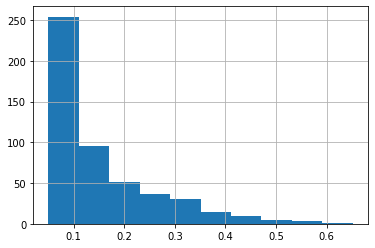

In [ ]:
new_data['Max_Procalcitonine'].hist()